In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("2022-06-28-2025-05-01-Russia-Ukraine.csv")
df=pd.DataFrame(data)
df.head()

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,RUS36157,01 May 2025,2025,1,Political violence,Explosions/Remote violence,Air/drone strike,Military Forces of Ukraine (2019-) Air Force,Military Forces of Ukraine (2019-),8,...,Romanovka,50.9545,35.4445,1,Belgorod Governor,Subnational,"On 1 May 2025, Ukrainian military carried out ...",0,NaN,1746560207
1,UKR223669,01 May 2025,2025,1,Political violence,Explosions/Remote violence,Air/drone strike,Military Forces of Russia (2000-) Air Force,Military Forces of Russia (2000-),8,...,Bila Bereza,51.7339,34.3415,2,Ministry of Defence of Ukraine,Other,"On 1 May 2025, Russian forces conducted drone ...",0,NaN,1746560208
2,UKR223688,01 May 2025,2025,1,Political violence,Explosions/Remote violence,Air/drone strike,Military Forces of Russia (2000-) Air Force,NaN,8,...,Kovpynka,52.2196,33.2445,2,Ministry of Defence of Ukraine,Other,"On 1 May 2025, Russian forces conducted a KAB ...",0,NaN,1746560208
3,UKR223714,01 May 2025,2025,1,Political violence,Explosions/Remote violence,Air/drone strike,Military Forces of Russia (2000-) Air Force,NaN,8,...,Prokhody,50.9208,35.3411,2,Ministry of Defence of Ukraine,Other,"On 1 May 2025, Russian forces conducted 3 KAB ...",0,NaN,1746560208
4,UKR223720,01 May 2025,2025,1,Political violence,Explosions/Remote violence,Air/drone strike,Military Forces of Russia (2000-) Air Force,NaN,8,...,Stepok,50.8508,35.3941,2,Ministry of Defence of Ukraine,Other,"On 1 May 2025, Russian forces conducted 6 KAB ...",0,NaN,1746560208


In [4]:
#colums identification
df.columns

Index(['event_id_cnty', 'event_date', 'year', 'time_precision',
       'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'interaction', 'civilian_targeting', 'iso',
       'region', 'country', 'admin1', 'admin2', 'admin3', 'location',
       'latitude', 'longitude', 'geo_precision', 'source', 'source_scale',
       'notes', 'fatalities', 'tags', 'timestamp'],
      dtype='object')

removing columns that does't affect the ccm model

In [5]:
df.drop(["time_precision", "assoc_actor_1", "inter1", "interaction", "civilian_targeting", "iso", "region", "admin2", "admin3", "geo_precision", "source", "source_scale", "tags"],axis=1,inplace=True)

In [6]:
df.isnull().sum()


event_id_cnty        0
event_date           0
year                 0
disorder_type        0
event_type           0
sub_event_type       0
actor1            4792
country              0
admin1             188
location             0
latitude             0
longitude            0
notes                0
fatalities           0
timestamp            0
dtype: int64

In [7]:
#removing the null values cause don't want to mess with professional data
df=df.dropna()

In [8]:
df.head()

,event_id_cnty,event_date,year,disorder_type,event_type,sub_event_type,actor1,country,admin1,location,latitude,longitude,notes,fatalities,timestamp
0,RUS36157,01 May 2025,2025,Political violence,Explosions/Remote violence,Air/drone strike,Military Forces of Ukraine (2019-) Air Force,Russia,Belgorod,Romanovka,50.9545,35.4445,"On 1 May 2025, Ukrainian military carried out ...",0,1746560207
1,UKR223669,01 May 2025,2025,Political violence,Explosions/Remote violence,Air/drone strike,Military Forces of Russia (2000-) Air Force,Ukraine,Sumy,Bila Bereza,51.7339,34.3415,"On 1 May 2025, Russian forces conducted drone ...",0,1746560208
2,UKR223688,01 May 2025,2025,Political violence,Explosions/Remote violence,Air/drone strike,Military Forces of Russia (2000-) Air Force,Ukraine,Chernihiv,Kovpynka,52.2196,33.2445,"On 1 May 2025, Russian forces conducted a KAB ...",0,1746560208
3,UKR223714,01 May 2025,2025,Political violence,Explosions/Remote violence,Air/drone strike,Military Forces of Russia (2000-) Air Force,Ukraine,Sumy,Prokhody,50.9208,35.3411,"On 1 May 2025, Russian forces conducted 3 KAB ...",0,1746560208
4,UKR223720,01 May 2025,2025,Political violence,Explosions/Remote violence,Air/drone strike,Military Forces of Russia (2000-) Air Force,Ukraine,Sumy,Stepok,50.8508,35.3941,"On 1 May 2025, Russian forces conducted 6 KAB ...",0,1746560208


In [9]:
df["event_date"] = pd.to_datetime(df["event_date"])
df = df.sort_values("event_date")
df.head()

,event_id_cnty,event_date,year,disorder_type,event_type,sub_event_type,actor1,country,admin1,location,latitude,longitude,notes,fatalities,timestamp
288342,UKR62369,2022-06-28,2022,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,NAF: United Armed Forces of Novorossiya,Ukraine,Luhansk,Perevalsk,48.4378,38.8438,"On 28 June 2022, Ukrainian forces fired M142 H...",10,1750789238
288165,UKR61664,2022-06-28,2022,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Russia (2000-),Ukraine,Kharkiv,Tsyrkuny,50.0824,36.3857,"On 28 June 2022, Russian forces fired artiller...",2,1719939648
288164,UKR62009,2022-06-28,2022,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Russia (2000-),Ukraine,Sumy,Starykove,51.6209,34.1471,"On 28 June 2022, Russian forces fired rocket a...",0,1719352939
288163,UKR61979,2022-06-28,2022,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Russia (2000-),Ukraine,Zaporizhia,Novodanylivka,47.5242,35.8235,"On 28 June 2022, Russian forces fired rocket a...",0,1715131311
288162,UKR61983,2022-06-28,2022,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Russia (2000-),Ukraine,Zaporizhia,Orikhiv,47.5673,35.7858,"On 28 June 2022, Russian forces fired artiller...",0,1715131311


In [10]:
df["disorder_type"].value_counts()

disorder_type
Political violence                    257868
Strategic developments                 23390
Demonstrations                          2103
Political violence; Demonstrations         2
Name: count, dtype: int64

In [11]:
df["event_type"].value_counts()

event_type
Explosions/Remote violence    170644
Battles                        85066
Strategic developments         23390
Violence against civilians      2118
Protests                        2093
Riots                             52
Name: count, dtype: int64

In [15]:
ru_series = df[df['country'] == 'Russia'].groupby(pd.Grouper(key='event_date', freq='D'))['event_type'].sum()
uk_series = df[df['country'] == 'Ukraine'].groupby(pd.Grouper(key='event_date', freq='D'))['fatalities'].sum()

In [16]:
event_ts = df.groupby(["event_date", "event_type"]).size().unstack().fillna(0)
event_ts.head()

event_type,Battles,Explosions/Remote violence,Protests,Riots,Strategic developments,Violence against civilians
event_date,,,,,,
2022-06-28,48.0,164.0,2.0,0.0,42.0,4.0
2022-06-29,42.0,102.0,2.0,0.0,23.0,0.0
2022-06-30,62.0,165.0,0.0,0.0,32.0,2.0
2022-07-01,22.0,145.0,5.0,0.0,37.0,8.0
2022-07-02,26.0,183.0,1.0,0.0,20.0,0.0


In [20]:
from scipy.stats import zscore

# Step 1: Count events and sum fatalities
ru_series = df[df['country'] == 'Russia'].groupby(pd.Grouper(key='event_date', freq='D'))['event_type'].count()
uk_series = df[df['country'] == 'Ukraine'].groupby(pd.Grouper(key='event_date', freq='D'))['fatalities'].sum()

# Step 2: Apply smoothing
ru_series = ru_series.rolling(7, center=True).mean()
uk_series = uk_series.rolling(7, center=True).mean()

# Step 3: Drop NaNs before zscore
ru_series = ru_series.dropna()
uk_series = uk_series.dropna()

# Step 4: Align indexes (important before applying zscore)
common_index = ru_series.index.intersection(uk_series.index)
ru_series = ru_series.loc[common_index]
uk_series = uk_series.loc[common_index]

# Step 5: Z-score and convert back to Series
ru_series_z = pd.Series(zscore(ru_series), index=ru_series.index)
uk_series_z = pd.Series(zscore(uk_series), index=uk_series.index)

# Step 6: Combine into final CCM input DataFrame
df_ccm = pd.DataFrame({
    'time': ru_series_z.index,
    'ru_events': ru_series_z,
    'uk_fatalities': uk_series_z
}).dropna().reset_index(drop=True)

df_ccm.head()


,time,ru_events,uk_fatalities
0,2022-07-01,-0.965510,-0.751796
1,2022-07-02,-0.939347,-0.837709
2,2022-07-03,-0.939347,-1.357008
3,2022-07-04,-0.926265,-1.150816
4,2022-07-05,-0.913183,-1.393283


In [25]:
import pyEDM

# You already have df_ccm in memory, use it directly
ccm_ru_to_uk = pyEDM.CCM(dataFrame=df_ccm,
                         E=3,
                         columns="ru_events",
                         target="uk_fatalities",
                         libSizes="10 100 10",
                         sample=100)

ccm_uk_to_ru = pyEDM.CCM(dataFrame=df_ccm,
                         E=3,
                         columns="uk_fatalities",
                         target="ru_events",
                         libSizes="10 100 10",
                         sample=100)


In [26]:
import pandas as pd

# Convert CCM output (list of dicts) to DataFrames
df_ru_to_uk = pd.DataFrame(ccm_ru_to_uk)
df_uk_to_ru = pd.DataFrame(ccm_uk_to_ru)


In [28]:
print(type(ccm_ru_to_uk))
print(ccm_ru_to_uk[:2])  # preview first 2 entries


<class 'pandas.core.frame.DataFrame'>
   LibSize  ru_events:uk_fatalities  uk_fatalities:ru_events
0       10                 0.639928                 0.661133
1       20                 0.686213                 0.722089


In [29]:
df_ru_to_uk = pd.DataFrame(ccm_ru_to_uk)
df_uk_to_ru = pd.DataFrame(ccm_uk_to_ru)

# Standardize column names
df_ru_to_uk.columns = [col.lower() for col in df_ru_to_uk.columns]
df_uk_to_ru.columns = [col.lower() for col in df_uk_to_ru.columns]


In [32]:
print(df_ru_to_uk.columns)


Index(['libsize', 'ru_events:uk_fatalities', 'uk_fatalities:ru_events'], dtype='object')


In [33]:
df_plot = df_ru_to_uk.rename(columns={
    'ru_events:uk_fatalities': 'ru→uk',
    'uk_fatalities:ru_events': 'uk→ru',
    'libsize': 'libsize'  # Optional but explicit
})


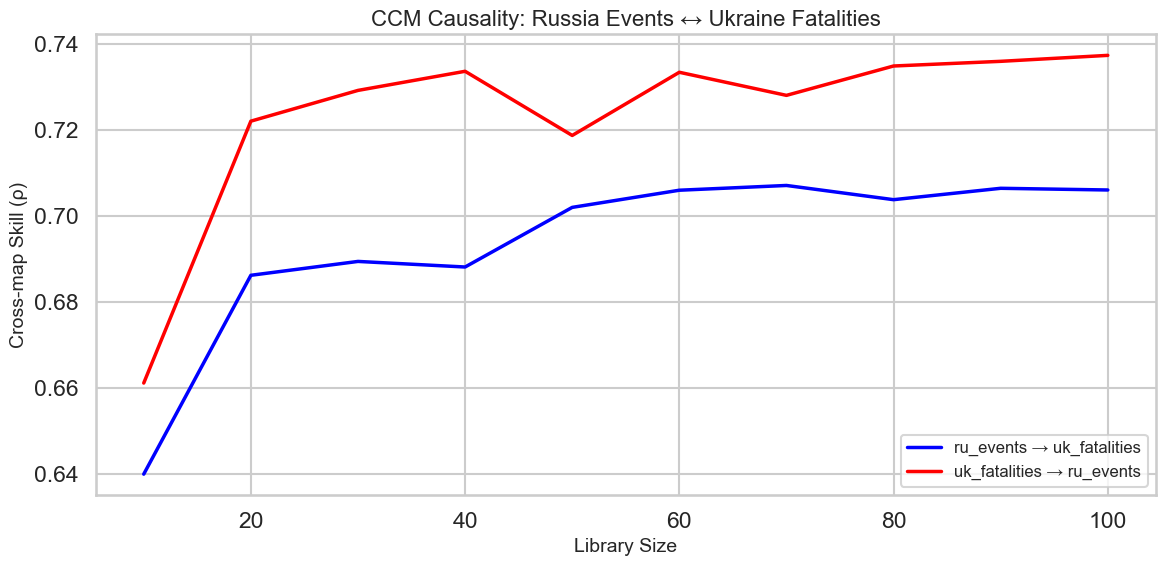

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(12, 6))

sns.lineplot(data=df_plot, x='libsize', y='ru→uk', label='ru_events → uk_fatalities', color='blue', linewidth=2.5)
sns.lineplot(data=df_plot, x='libsize', y='uk→ru', label='uk_fatalities → ru_events', color='red', linewidth=2.5)

plt.title("CCM Causality: Russia Events ↔ Ukraine Fatalities", fontsize=16)
plt.xlabel("Library Size", fontsize=14)
plt.ylabel("Cross-map Skill (ρ)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()
